# Widzenie komputerowe - Laboratoria nr 11

## Opis laboratoriów

Wprowadzenie do biblioteki PyTorch oraz neuronowych modeli wizyjnych.

## Funkcje pomocnicze

### Niezbędne biblioteki


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2
import PIL

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from pprint import pprint

### Zbiory danych

- MNIST - popularny zbiór danych przedstawiający obrazki o rozmiarze 28x28 zawierające odręczne pismo w postaci cyfr. Więcej informacji pod [linkiem](http://yann.lecun.com/exdb/mnist/).

### Wizualizacja



Skrypt do wyżwietlania obrazów BGR oraz Grayscale.

In [2]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

# PyTorch

## Wstęp do PyTorch

In [3]:
np_arr = np.zeros([5, 5])
torch_arr = torch.zeros([5, 5])

print('NumPy array:\n', np_arr, '\n')
print('PyTorch array:\n', torch_arr, '\n')

np_arr = np.ones([5, 5])
torch_arr = torch.ones([5, 5])

print('NumPy array:\n', np_arr, '\n')
print('PyTorch array:\n', torch_arr, '\n')

np_arr = np.array([1, 2, 3, 4, 5])
torch_arr = torch.tensor([1, 2, 3, 4, 5])

print('NumPy array:\n', np_arr, '\n')
print('PyTorch array:\n', torch_arr, '\n')

np_arr = np.random.normal(0, 1, [5, 5])
torch_arr = torch.randn(5, 5)

print('NumPy array:\n', np_arr, '\n')
print('PyTorch array:\n', torch_arr, '\n')

NumPy array:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

PyTorch array:
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 

NumPy array:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

PyTorch array:
 tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

NumPy array:
 [1 2 3 4 5] 

PyTorch array:
 tensor([1, 2, 3, 4, 5]) 

NumPy array:
 [[ 0.60176327 -0.48932308  1.71391211  0.01732194 -0.58114946]
 [ 0.51840877 -0.96576105  1.32396019 -0.42044411 -0.12346452]
 [ 0.6943384   0.56733944  0.23967553 -1.96481108 -0.57257569]
 [-1.09212128  1.47791751  0.7182701  -0.71784117  0.90289806]
 [ 0.15103583  2.23072586  0.81366487 -1.14054584 -0.77247689]] 

PyTorch array:
 tensor([[-0.9184,  0.6721, -1.

przez operacje na danych:

In [4]:
np_a = np.ones([5, 5])
torch_a = torch.ones([5, 5])

np_a = np_a + np_a
np_a = np_a * np_a
np_a = np_a ** 2 + np_a ** 3

torch_a = torch_a + torch_a
torch_a = torch_a * torch_a
torch_a = torch_a ** 2 + torch_a ** 3

print('NumPy array:\n', np.sqrt(np_a), '\n')
print('PyTorch array:\n', torch.sqrt(torch_a), '\n')

NumPy array:
 [[8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]] 

PyTorch array:
 tensor([[8.9443, 8.9443, 8.9443, 8.9443, 8.9443],
        [8.9443, 8.9443, 8.9443, 8.9443, 8.9443],
        [8.9443, 8.9443, 8.9443, 8.9443, 8.9443],
        [8.9443, 8.9443, 8.9443, 8.9443, 8.9443],
        [8.9443, 8.9443, 8.9443, 8.9443, 8.9443]]) 



PyTorch zawiera implementacje funkcji redukcji wymiarowości, m.in. suma, średnia, minimum, maximum.

In [5]:
print('NumPy sum:', np_a.sum())
print('NumPy mean:', np_a.mean())
print('NumPy min:', np_a.min())
print('NumPy max:', np_a.max())

print('PyTorch sum:', torch_a.sum())
print('PyTorch mean:', torch_a.mean())
print('PyTorch min:', torch_a.min())
print('PyTorch max:', torch_a.max())

NumPy sum: 2000.0
NumPy mean: 80.0
NumPy min: 80.0
NumPy max: 80.0
PyTorch sum: tensor(2000.)
PyTorch mean: tensor(80.)
PyTorch min: tensor(80.)
PyTorch max: tensor(80.)


Analogicznie do NumPy, redukcję można wykonać względem ustalonych wymiarów:

In [6]:
print('NumPy sum:', np_a.sum(0))
print('NumPy mean:', np_a.mean(1))
print('NumPy min:', np_a.min(0))
print('NumPy max:', np_a.max(1))

print('PyTorch sum:', torch_a.sum(0))
print('PyTorch mean:', torch_a.mean(1))
# amin, amax vs min, max: https://pytorch.org/docs/stable/generated/torch.amax.html
print('PyTorch min:', torch_a.amin(0))
print('PyTorch max:', torch_a.amax(1))

NumPy sum: [400. 400. 400. 400. 400.]
NumPy mean: [80. 80. 80. 80. 80.]
NumPy min: [80. 80. 80. 80. 80.]
NumPy max: [80. 80. 80. 80. 80.]
PyTorch sum: tensor([400., 400., 400., 400., 400.])
PyTorch mean: tensor([80., 80., 80., 80., 80.])
PyTorch min: tensor([80., 80., 80., 80., 80.])
PyTorch max: tensor([80., 80., 80., 80., 80.])


### Zmienne

W PyTorch w przeciwieństwie do TensorFlow **nie** rozróżniamy pomiędzy **Variable** a **Constant**. Wszystkie wartości przechowujemy w **Tensorach**. Wartości te mogą być uaktualniane.

In [7]:
# inicjalizacja zmiennej z losowymi wartościami z rozkładu jednostajnego
b = torch.rand(5)

print(b.numpy())

# wykonanie operacji dodawania na zmiennej
b += torch.tensor([1, 0, 0, 1, 0])

print(b.numpy())

# wykonanie operacji odejmowania na zmiennej
b -= torch.tensor([1, 0, 0, 1, 0])

print(b.numpy())

# wykonanie operacji przypisania na zmiennej
b = torch.tensor([1, 2, 3, 4, 5])

print(b.numpy())

[0.01641738 0.2197622  0.6109646  0.27812588 0.8272006 ]
[1.0164174 0.2197622 0.6109646 1.2781259 0.8272006]
[0.01641738 0.2197622  0.6109646  0.27812588 0.8272006 ]
[1 2 3 4 5]


## Podstawowe operacje neuronowe

Jedną z podstawowych operacji neuronowych jest warstwa **w pełni połączona**, czyli warstwa składająca się z **neuronów**. Każdy neuron wykonuje operację **kombinacji liniowej** z następującą **funkcją aktywacji**:

$$z_j = \sum x_i * w_{ij} + b_j$$
$$y_j = f(z_j)$$

lub innymi słowy, neuron pobiera wektor danych wejściowych, przemnaża go przez wektor **zmiennych uczonych**, sumuje, dodaje wyraz wolny (funkcja liniowa) oraz aplikuje pewną funkcję aktywacji.


In [8]:
w = torch.rand(10, 5, dtype=torch.float32)
b = torch.rand(5, dtype=torch.float32)

print(f'w: {w}\nb: {b}')

w: tensor([[0.6610, 0.5896, 0.2715, 0.6405, 0.7488],
        [0.5482, 0.0127, 0.3423, 0.9317, 0.1987],
        [0.3624, 0.9143, 0.5728, 0.8678, 0.1115],
        [0.5249, 0.1871, 0.0571, 0.4529, 0.0541],
        [0.2916, 0.8800, 0.4680, 0.3343, 0.9806],
        [0.5912, 0.4143, 0.2569, 0.7727, 0.2670],
        [0.8996, 0.6703, 0.8206, 0.9663, 0.2147],
        [0.8915, 0.3151, 0.0647, 0.3061, 0.4216],
        [0.2855, 0.9759, 0.4446, 0.6163, 0.0646],
        [0.8581, 0.3206, 0.1551, 0.8564, 0.9388]])
b: tensor([0.7430, 0.8245, 0.8921, 0.7959, 0.0965])


In [9]:
def neuron(x, f=lambda x: x):
  return f(x @ w + b)

In [10]:
x = torch.randn(1, 10)
y = neuron(x)

print(f'{x.shape = }: {x}\n{y.shape = }: {y}')

x.shape = torch.Size([1, 10]): tensor([[ 0.0859,  2.1992,  1.9051,  1.5618,  0.4257, -1.6073,  0.0069,  0.4614,
          0.1647,  0.4541]])
y.shape = torch.Size([1, 5]): tensor([[3.5436, 3.1024, 2.8142, 4.7990, 1.5158]])


Jak widać na powyższym przykładzie operację kombinacji liniowej dla wielu wektorów (tzn. przetwarzanie można zoptymalizować wykonując operacje neuronu na wielu przykładach na raz) można zrealizować jako mnożenie macierzy.

In [11]:
x = torch.randn(5, 10)
y = neuron(x)

print(f'{x.shape = }: {x}\n{y.shape = }: {y}')

x.shape = torch.Size([5, 10]): tensor([[ 0.9325,  0.1939, -0.8496,  1.8460,  0.8352, -0.8438,  0.5481, -0.1653,
          0.1064, -0.0421],
        [ 1.8039,  0.1282, -0.9255, -1.4170,  1.0640,  1.8938,  0.7436, -0.0865,
         -1.0344,  0.2753],
        [ 0.2779,  2.2173, -1.2534,  0.6866,  0.3514,  0.7531, -1.0720, -0.4952,
         -0.7388,  0.4825],
        [ 1.2229,  0.5880,  1.6723, -0.1674, -1.7892, -0.2140,  1.0274,  2.1544,
         -0.0869,  0.2819],
        [-0.8553,  0.4126,  0.0339, -0.7518, -1.0451,  1.2967,  0.9356, -0.1592,
          1.0469,  0.3143]])
y.shape = torch.Size([5, 5]): tensor([[ 2.2114,  1.7364,  1.4844,  1.8083,  1.4474],
        [ 2.8892,  2.0493,  1.9865,  2.7353,  3.1566],
        [ 1.3933, -0.8207,  0.2403,  1.7328,  1.1545],
        [ 4.8056,  2.7606,  2.4689,  4.5789,  0.8827],
        [ 1.7518,  1.5327,  1.8931,  2.7438, -0.6811]])


Powyższa implementacja neuronu wykorzystuje funkcję aktywacji **identity**, czyli brak modyfikacji, a więc jest to funkcja liniowa. Do innych funkcji aktywacji można zaliczyć:
- relu - jedna z ważniejszych operacji ze względu na jej prostą pochodną.,
- sigmoid - jedna z pierwszych aplikowanych funkcji aktywacji w neuronach,
- tangens hiperboliczny - najczęściej wykorzystywana w sieciach rekurencyjnych,
- elu, selu, relu6, itp. - różne modyfikacje funkcji relu.


<ipython-input-12-cb76b6c6f5aa>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 8, 0.1, dtype=torch.float32)


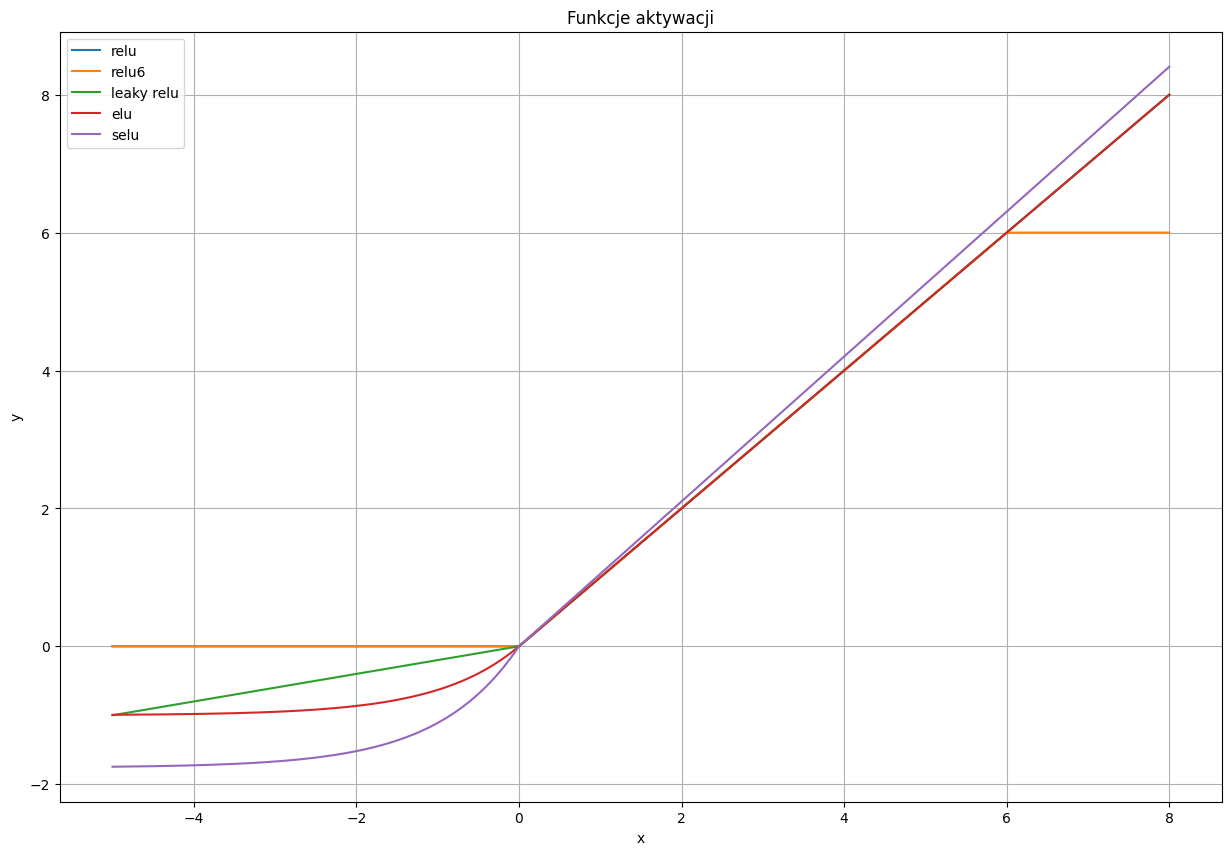

In [12]:
x = torch.range(-5, 8, 0.1, dtype=torch.float32)

plt.figure(figsize=(15, 10))
plt.title('Funkcje aktywacji')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, torch.nn.functional.relu(x), label='relu')
plt.plot(x, torch.nn.functional.relu6(x), label='relu6')
plt.plot(x, torch.nn.functional.leaky_relu(x, 0.2), label='leaky relu')
plt.plot(x, torch.nn.functional.elu(x), label='elu')
plt.plot(x, torch.nn.functional.selu(x), label='selu')
plt.grid()
plt.legend()
plt.show()

<ipython-input-13-69e13d9b6914>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-3, 3, 0.1, dtype=torch.float32)


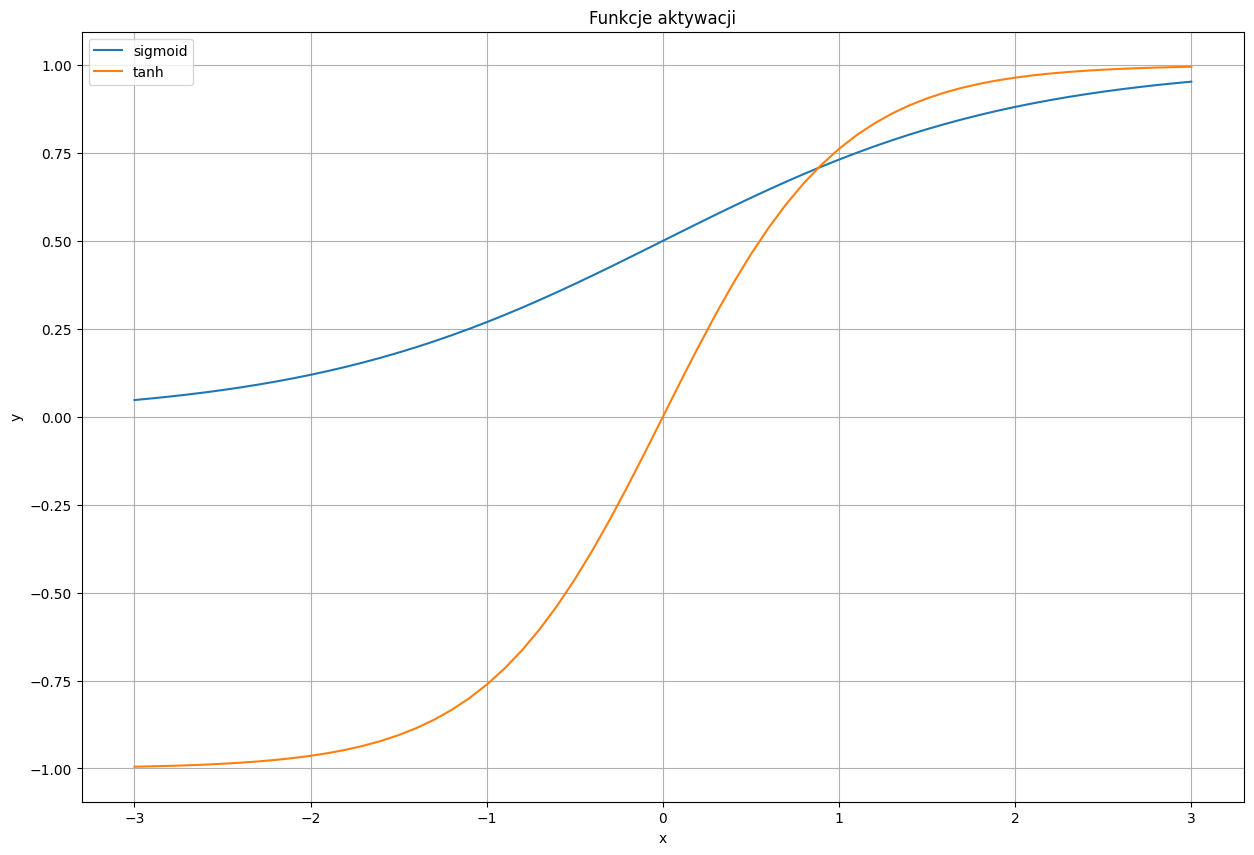

In [13]:
x = torch.range(-3, 3, 0.1, dtype=torch.float32)
plt.figure(figsize=(15, 10))
plt.title('Funkcje aktywacji')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, torch.nn.functional.sigmoid(x), label='sigmoid')
plt.plot(x, torch.nn.functional.tanh(x), label='tanh')
plt.grid()
plt.legend()
plt.show()

In [14]:
x = torch.randn(5, 10)
y = neuron(x, torch.nn.functional.relu)

print(f'{x.shape = }: {x}\n{y.shape = }: {y}')

x.shape = torch.Size([5, 10]): tensor([[ 0.3064,  0.6666,  1.2570, -2.3650, -2.8470,  1.6940,  0.0804, -0.4840,
         -0.2906,  0.4261],
        [-0.2641,  0.1454,  0.7432, -0.8449, -0.6000, -0.2798,  1.3720, -1.3261,
         -1.0833, -1.5523],
        [ 0.0871,  1.4930,  0.2699, -2.0987,  0.4904,  0.9206,  1.5325, -0.5421,
          0.4670, -0.0466],
        [-0.0106,  0.8876,  1.5654, -0.6540, -0.4914,  1.3087,  1.8104,  0.9114,
          0.3907,  0.2320],
        [-0.3354, -1.3501,  0.6918,  0.0555,  0.8402,  0.0899, -0.8285,  0.6306,
         -0.6217, -1.6537]])
y.shape = torch.Size([5, 5]): tensor([[0.6201, 0.0000, 0.8626, 2.1054, 0.0000],
        [0.0000, 0.0000, 1.2126, 0.0000, 0.0000],
        [2.2913, 2.8592, 3.3504, 3.9646, 1.1884],
        [4.8287, 4.2047, 3.9128, 5.9931, 1.2874],
        [0.0000, 0.5357, 0.0000, 0.0000, 0.0000]])


In [15]:
x = torch.randn(5, 10)
y = neuron(x, torch.nn.functional.tanh)

print(f'{x.shape = }: {x}\n{y.shape = }: {y}')

x.shape = torch.Size([5, 10]): tensor([[ 2.0176, -0.4981, -0.1387, -0.8864, -1.5479, -0.2335,  0.8335, -0.3036,
          0.1251, -0.4995],
        [-2.0608, -0.4040,  0.0428, -1.6234, -0.9263,  1.0431,  1.0883, -0.8922,
          1.1860, -1.1710],
        [-0.4261, -1.1131,  2.3832,  0.9503, -0.2843, -0.4483,  0.0077,  0.6156,
          0.7414, -0.4079],
        [ 1.0576, -1.0216, -1.2129,  0.3084,  0.5223, -0.4053,  0.1617,  0.3201,
         -0.1367, -1.0595],
        [-0.5565, -1.1631,  0.2434, -0.9103, -0.4523,  0.6490,  1.0989,  0.4080,
         -0.7998, -0.6548]])
y.shape = torch.Size([5, 5]): tensor([[ 6.5558e-01,  5.9221e-01,  7.6046e-01,  6.4466e-01, -4.9687e-01],
        [-9.4816e-01,  1.8486e-01,  8.1490e-01, -5.3393e-01, -9.9780e-01],
        [ 8.5728e-01,  9.9713e-01,  9.5440e-01,  9.5140e-01, -5.3631e-01],
        [-1.6147e-04,  3.8994e-01,  2.1759e-01, -8.5308e-01,  1.3624e-01],
        [ 1.6056e-01,  2.7240e-01,  6.9434e-01, -3.4690e-01, -8.0125e-01]])


Poniżej zaprezentowana jest implementacja neuronu w **PyTorch API**.

**Uwaga:** podczas pierwszego wywołania neuronu w zaalokowane zostaną wewnątrzne zmienne uczące się.

In [16]:
neurons = torch.nn.Sequential(
    torch.nn.Linear(10, 5),
    torch.nn.ReLU(),
)

In [17]:
x = torch.randn(5, 10)
y = neurons(x)

print(f'{x.shape = }: {x}\n{y.shape = }: {y}')
print('\n\nZmienne wewnętrzne:')
for p in neurons.parameters():
  print(f'{p.shape}, {p.data}')

x.shape = torch.Size([5, 10]): tensor([[-0.3591, -2.9151,  1.8426,  0.4234, -0.0156, -0.2535, -0.3971, -0.8604,
          0.3638, -1.2252],
        [-0.2921,  1.1428, -0.2321,  0.1796,  1.8960,  0.9399,  1.1728,  0.7648,
          0.9488,  0.7125],
        [ 1.8655,  1.7306,  0.9594,  0.0475, -0.1520, -0.9700,  1.0199, -0.1565,
         -2.0389, -0.8021],
        [-0.7838,  0.4283,  2.2944, -0.1742, -0.8162, -1.6695, -1.9211, -1.1536,
         -0.2603,  0.3845],
        [-1.4167, -0.8550, -0.6683, -1.9726,  0.2934, -0.0265,  0.4630, -0.7072,
          0.2166,  0.6159]])
y.shape = torch.Size([5, 5]): tensor([[0.0000, 0.7289, 0.0000, 0.0000, 0.0000],
        [0.6016, 0.0280, 0.5713, 0.3224, 0.0000],
        [1.8695, 0.3953, 0.0000, 0.9866, 0.7499],
        [0.2558, 0.0000, 0.0700, 0.7168, 0.0392],
        [0.0000, 0.0000, 0.6674, 0.2458, 0.0000]], grad_fn=<ReluBackward0>)


Zmienne wewnętrzne:
torch.Size([5, 10]), tensor([[ 0.2184,  0.2064,  0.2378, -0.0965,  0.0296,  0.0247,  0.2098,  0

Operując biblioteką PyTorch w kontekście Widzenia Komputerowego, można zauważyć, że posiada ona wiele operacji poznanych wcześniej w ramach klasycznego przetwarzania obrazów. Są to m.in. konwolucja oraz pooling.

**Uwaga:** formalnie, konwolucja jest operacją ''przemnożenia'' **odwróconym** filtrem danych wejściowych. ''Przemnożenie'' **nieodwróconym** filtrem nazywa się operacją **koralacji**. Ze względu na fakt, że w przetwarzaniu neuronowym filtrem są zmienne uczące się, nie ma znaczenia czy odwrócimy czy nie filtr. Dlatego w celach optymalizacyjnych implementacja konwolucji w PyTorch jest formalnie operacją korelacji.

Poniżej zaprezentowana została implementacja konwolucji w kontekście laboratoriów dotyczących operacji splotowych.

Dla podanych tablic **f** i **g** wykonaj operację konwolucji. Zastosuj uzupełnienie zerami, przesunięcie jednostkowe oraz rozszerzenie równe 1.

$f = [1, 2, 3]$  
$g = [1, 0, 1]$

**1. Uzupełnienie:**

$f = [0, 1, 2, 3, 0]$

**2. Wykonanie konwolucji:**

Konwolucja zostanie wykonana dla $t \in <0, 1, 2>$

$(f \ast g)(0) = 0 * 1 + 1 * 0 + 2 * 1 = 2$  
$(f \ast g)(1) = 1 * 1 + 2 * 0 + 3 * 1 = 4$  
$(f \ast g)(2) = 2 * 1 + 3 * 0 + 0 * 1 = 2$  

$f \ast g = [2, 4, 2]$

In [18]:
torch.tensor([1, 2, 3]).reshape(1, -1, 1)

tensor([[[1],
         [2],
         [3]]])

In [19]:
a = torch.tensor([1, 2, 3])
f = torch.tensor([1, 0, 1])

y = torch.nn.functional.conv1d(a.reshape(1, 1, -1), f.reshape(1, 1, -1), stride=1, padding='same')

print(f'a: {a}')
print(f'f: {f}')
print(f'y: {y[0, 0]}')

a: tensor([1, 2, 3])
f: tensor([1, 0, 1])
y: tensor([2, 4, 2])


PyTorch zawiera gotową implementację warstwy konwolucyjnej zawierającą również zarządzanie zmiennymi uczącymi. Domyślną konfiguracją biblioteki PyTorch jest wspieranie **wielu operacji na raz**, np. zamiast wykonując konwolucję jednego filtru, może być ich wykonanych N.

Dla poniższego przykładu danymi wejściowymi jest tensor 4 wymiarowy **(pierwszy wymiar zazwyczaj traktowany jest jako liczna równoległych przykładów przetwarzanych na raz)**, który może oznaczać np. 3 obrazy o rozmiarze 128x128, 3 kanałach (float).

Pojedynczą operacją konwolucji byłoby stworzenie filtru np. 5x5 który obsługuje dane wejściowe 3-wymiarowe. Czyli pojedynczy filtr miałby rozmiar \[5, 5, 3\]. Efektem wykonania konwolucji na obrazach wejściowych byłby **batch** obrazów o rozmiarze \[3, 128, 128, 1\] (ponieważ każdy filtr produkuje jedną wartość.

Jeśli wykonamy N takich niezależnych filtrów, otrzymamy tensor \[3, 128, 128, N\].

In [20]:
N = 10
kernel_size = (5, 5)

conv1 = torch.nn.Conv2d(3, N, kernel_size, stride=1, padding='same')

In [21]:
images = torch.ones(size=(1, 3, 128, 128), dtype=torch.float32)
images_filtered = conv1(images)

print(f'Rozmiar obrazów wejściowych: {images.shape}')
print(f'Rozmiar przefiltrowanych obrazów: {images_filtered.shape}')

Rozmiar obrazów wejściowych: torch.Size([1, 3, 128, 128])
Rozmiar przefiltrowanych obrazów: torch.Size([1, 10, 128, 128])


**W ten sposób, każdy z pikseli opisaliśmy N cechami.**

W przeciwieństwie do TensorFlow, w PyTorch najczęściej stosuje się konfigurację **Channel first**, oznacza do że wymiar liczby filtrów/kanałów występuje przed wymiarem obrazka.



Podobnymi operacjami są operacjie **poolingu**, czyli operacji które nie zawierają zmiennych uczących się, np. wybranie największej/najmniejszej/średniej/mediany wartości z danego okna.

In [22]:
f_max = torch.nn.MaxPool2d((2, 2), stride=2)
f_ave = torch.nn.AvgPool2d((2, 2), stride=2)

images_max = f_max(images_filtered)
images_ave = f_ave(images_filtered)

print(f'Rozmiar obrazów po max poolingu: {images_max.shape}')
print(f'Rozmiar obrazów po average poolingu: {images_ave.shape}')

Rozmiar obrazów po max poolingu: torch.Size([1, 10, 64, 64])
Rozmiar obrazów po average poolingu: torch.Size([1, 10, 64, 64])


W powyższym przykładzie zostosowane zostało przesunięcie z krokiem równym 2 (stąd rozmiar wynikowy jest 2-krotnie mniejszy).

Ostatnim przykładem podstawowej operacji w PyTorch jest funkcja wykonująca sekwencję operacji przekazując między sobą wyniki.

W ten sposób, można znacznie uprościć swój model przetwarzania, pod warunkiem, że wszelkie warstwy i pod-modele zaimplementowane będą w PyTorch API.

In [23]:
model = torch.nn.Sequential(
  torch.nn.Conv2d(3, 8, (3, 3), 2),
  torch.nn.ReLU(),
  torch.nn.Conv2d(8, 16, (3, 3), 2),
  torch.nn.ReLU(),
  torch.nn.Conv2d(16, 32, (3, 3), 2),
  torch.nn.ReLU(),
  torch.nn.Flatten(),
  torch.nn.Linear(7200, 10)
)

In [24]:
images = torch.ones(size=(1, 3, 128, 128), dtype=torch.float32)
y = model(images)

print(f'Rozmiar danych wejściowych: {images.shape}')
print(f'Rozmiar danych wyjściowych: {y.shape}')

Rozmiar danych wejściowych: torch.Size([1, 3, 128, 128])
Rozmiar danych wyjściowych: torch.Size([1, 10])


**W powyższym przykładzie każdy obraz opisaliśmy jako 10 wartości.**

## Proces uczenia

### Przygotowanie danych wejściowych

Jako dane wejściowe pobieramy obrazy pochodzące ze zbioru MNIST. Jeśli to możliwe najlepszym rozwiązaniem jest wykorzystanie **PyTorch Dataset API** do wczytania i preprocessingu danych.

In [25]:
def mnist(batch_size=16):
    training_data = datasets.MNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor()
    )

    test_data = datasets.MNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor()
    )
    train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
    test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

    return train_dataloader, test_dataloader

Dane składają się z listy par: obraz, klasa przyporządkowana do obrazu.

In [26]:
train_ds, val_ds = mnist(128)

first_train_batch = next(iter(train_ds))
images, labels = first_train_batch

print(images.shape, labels.shape)

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 612kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.55MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.57MB/s]

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [27]:
imshow(images.numpy()[0, 0] * 255.)
imshow(images.numpy()[1, 0] * 255.)
imshow(images.numpy()[2, 0] * 255.)
imshow(images.numpy()[3, 0] * 255.)

### Przygotowanie modelu przetwarzanie

In [28]:
model = torch.nn.Sequential(
  torch.nn.Conv2d(1, 8, (3, 3), 2),
  torch.nn.ReLU(),
  torch.nn.Conv2d(8, 16, (3, 3), 2),
  torch.nn.ReLU(),
  torch.nn.Conv2d(16, 32, (3, 3), 2),
  torch.nn.ReLU(),
  torch.nn.Flatten(),
  torch.nn.Linear(128, 10)
)

In [29]:
y = model(images)

print(f'Rozmiar danych wejściowych: {images.shape}')
print(f'Rozmiar danych wyjściowych: {y.shape}')

Rozmiar danych wejściowych: torch.Size([64, 1, 28, 28])
Rozmiar danych wyjściowych: torch.Size([64, 10])


### Pętla uczenia modelu

In [30]:
optimizer = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 3

for epoch in range(epochs):
  model.train()
  for train_batch in train_ds:
    images, labels = train_batch
    optimizer.zero_grad()
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    accuracy = (outputs.argmax(1) == labels).sum() / labels.shape[0]
    loss.backward()
    optimizer.step()
  print(f'Epoch: {epoch + 1}/{epochs}, Loss: {loss.item():.5f}, Accuracy: {accuracy:.2f}')

  model.eval()
  val_loss, val_acc = [], []
  with torch.no_grad():
    for val_batch in val_ds:
      images, labels = val_batch
      outputs = model(images)
      val_loss.append(loss_fn(outputs, labels).item())
      val_acc.append((outputs.argmax(1) == labels).sum() / labels.shape[0])
  val_loss = np.mean(val_loss)
  val_acc = np.mean(val_acc)
  print(f'Validation loss: {val_loss:.5f}, Validation accuracy: {val_acc:.2f}')

Epoch: 1/3, Loss: 0.04955, Accuracy: 1.00
Validation loss: 0.18351, Validation accuracy: 0.94
Epoch: 2/3, Loss: 0.19548, Accuracy: 0.94
Validation loss: 0.11884, Validation accuracy: 0.96
Epoch: 3/3, Loss: 0.04282, Accuracy: 0.97
Validation loss: 0.09406, Validation accuracy: 0.97


In [31]:
images, labels = next(iter(val_ds))

predictions = model(images)

print(labels[:4])
print(torch.argmax(predictions[:4], -1))

imshow(images.numpy()[0, 0] * 255.)
imshow(images.numpy()[1, 0] * 255.)
imshow(images.numpy()[2, 0] * 255.)
imshow(images.numpy()[3, 0] * 255.)

tensor([6, 8, 5, 2])
tensor([6, 8, 5, 2])
